In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gina = "/content/drive/MyDrive/UCEMA/Cuatrimestre 1 - 2023/Analítica de Negocios/TP final IA/books_limpio_def.csv"
df = pd.read_csv(gina)
df

,id,book_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,...,genero_1,genero_2,genero_3,genero_4,description_en,title_en,texto,texto_limpio,texto_lemmatizado,Cluster
0,1,2767052,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,The Hunger Games,eng,...,Fiction,Fantasy,Young Adult,Science Fiction,Winning will make you famous. Losing means cer...,The Hunger Games,The Hunger Games Winning will make you famous....,hunger games winning make famous losing means ...,hunger game winning make famous losing mean ce...,3
1,3,41865,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,Twilight,eng,...,Fiction,Romance,Fantasy,Fantasy,About three things I was absolutely positive.F...,Twilight,Twilight About three things I was absolutely p...,twilight three things absolutely positivefirst...,twilight three thing absolutely positivefirst ...,3
2,4,2657,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,...,Fiction,Historical,Historical Fiction,Classics,The unforgettable novel of a childhood in a sl...,To Kill a Mockingbird,To Kill a Mockingbird The unforgettable novel ...,kill mockingbird unforgettable novel childhood...,kill mockingbird unforgettable novel childhood...,2
3,5,4671,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,...,Fiction,Romance,Historical,Young Adult,A true classic of twentieth-century literature...,The Great Gatsby,The Great Gatsby A true classic of twentieth-c...,great gatsby true classic twentiethcentury lit...,great gatsby true classic twentiethcentury lit...,2
4,6,11870085,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,...,Fiction,Romance,Young Adult,Contemporary,Despite the tumor-shrinking medical miracle th...,The Fault in Our Stars,The Fault in Our Stars Despite the tumor-shrin...,fault stars despite tumorshrinking medical mir...,fault star despite tumorshrinking medical mira...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,9995,15613,199,1416523723,9.781417e+12,Herman Melville,1924.0,"Billy Budd, Sailor","Billy Budd, Sailor",eng,...,Fiction,Historical,Literature,Literature,A handsome young sailor is unjustly accused of...,"Billy Budd, Sailor","Billy Budd, Sailor A handsome young sailor is ...",billy budd sailor handsome young sailor unjust...,billy budd sailor handsome young sailor unjust...,2
6881,9996,7130616,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,Bayou Moon,eng,...,Romance,Romance,Fantasy,Fantasy,"The Edge lies between worlds, on the border be...",Bayou Moon,"Bayou Moon The Edge lies between worlds, on th...",bayou moon edge lies worlds border broken peop...,bayou moon edge lie world border broken people...,2
6882,9997,208324,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,Means of Ascent,eng,...,Nonfiction,History,Biography,Politics,"Robert A. Caro's life of Lyndon Johnson, which...",Means of Ascent,Means of Ascent Robert A. Caro's life of Lyndo...,means ascent robert a caros life lyndon johnso...,mean ascent robert a caros life lyndon johnson...,3
6883,9998,77431,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,The Mauritius Command,eng,...,Fiction,Historical,Historical,Historical Fiction,"""O'Brian's Aubrey-Maturin volumes actually con...",The Mauritius Command,"The Mauritius Command ""O'Brian's Aubrey-Maturi...",mauritius command obrians aubreymaturin volume...,mauritius command obrians aubreymaturin volume...,1


#**Análisis descriptivo**

In [ ]:
df.columns

Index(['id', 'book_id', 'books_count', 'isbn', 'isbn13', 'authors',
       'original_publication_year', 'original_title', 'title', 'language_code',
       'average_rating', 'ratings_count', 'work_ratings_count',
       'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3',
       'ratings_4', 'ratings_5', 'pages', 'genre', 'genre_ordenado',
       'genero_1', 'genero_2', 'genero_3', 'genero_4', 'description_en',
       'title_en', 'texto', 'texto_limpio', 'texto_lemmatizado', 'Cluster'],
      dtype='object')

In [ ]:
df['title'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                        The Hunger Games
1                                                Twilight
2                                   To Kill a Mockingbird
3                                        The Great Gatsby
4                                  The Fault in Our Stars
                              ...                        
6880                                   Billy Budd, Sailor
6881                                           Bayou Moon
6882                                      Means of Ascent
6883                                The Mauritius Command
6884    Cinderella Ate My Daughter: Dispatches from th...
Name: title, Length: 6885, dtype: object>

In [ ]:
pd.unique(df['title'])

array(['The Hunger Games', 'Twilight', 'To Kill a Mockingbird', ...,
       'Means of Ascent', 'The Mauritius Command',
       'Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture'],
      dtype=object)

## Nulos

In [ ]:
df.isna().sum()

id                           0
book_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
pages                        0
genre                        0
genre_ordenado               0
genero_1                     0
genero_2                     0
genero_3                     0
genero_4                     0
description_en               0
title_en                     1
texto                        0
texto_limpio                 0
texto_lemmatizado            0
Cluster                      0
dtype: i

##Columnas Númericas

In [ ]:
paleta_colores = ['#B7E4C7', '#A1D7D2', '#8ACAD7', '#73BDDC', '#5DACE1', '#4799E6', '#3083EB', '#1A6EEF']

       books_count  average_rating  ratings_count        pages
count  6885.000000     6885.000000   6.885000e+03  6885.000000
mean     84.945679        4.003034   6.018872e+04   364.766885
std     182.430865        0.246712   1.620129e+05   204.152960
min       1.000000        2.470000   4.225000e+03     0.000000
25%      26.000000        3.850000   1.447300e+04   256.000000
50%      44.000000        4.020000   2.329400e+04   338.000000
75%      73.000000        4.170000   4.649800e+04   431.000000
max    2618.000000        4.820000   4.780653e+06  3342.000000


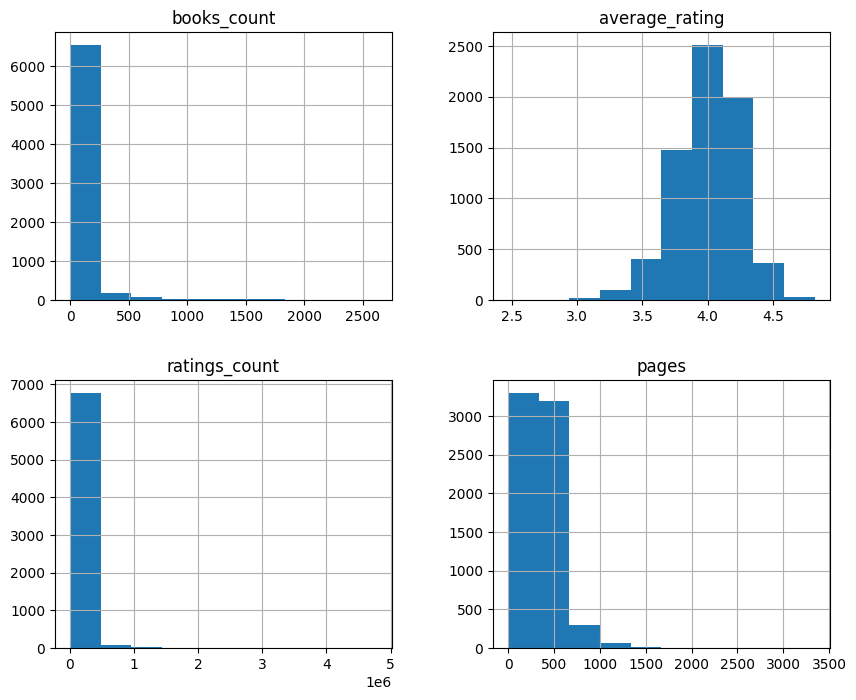

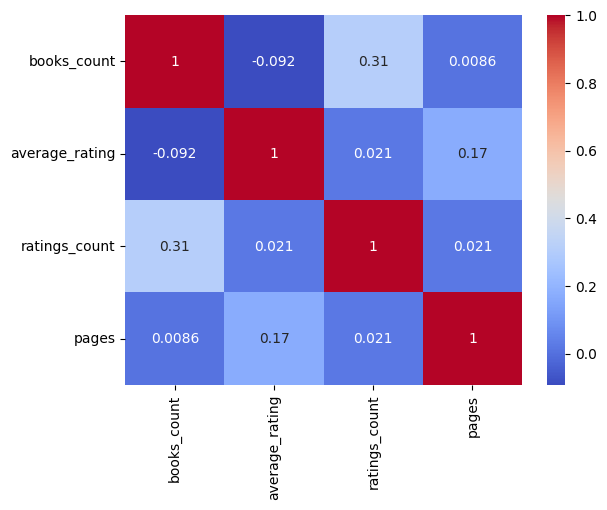

In [ ]:
# Calcula estadísticas descriptivas de columnas numéricas
print(df[['books_count', 'average_rating', 'ratings_count', 'pages']].describe())

# Grafica histogramas de columnas numéricas
df[['books_count', 'average_rating', 'ratings_count', 'pages']].hist(figsize=(10, 8))
plt.show()

# Calcula correlaciones entre columnas numéricas
corr_matrix = df[['books_count', 'average_rating', 'ratings_count', 'pages']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df['original_publication_year'].unique()

array([ 2008.,  2005.,  1960.,  1925.,  2012.,  1951.,  2003.,  2011.,
        1949.,  1945.,  1947.,  2009.,  1954.,  2010.,  2002.,  1595.,
        1937.,  1997.,  1988.,  1993.,  1996.,  2006.,  1868.,  1847.,
        2001.,  1953.,  1974.,  2007.,  1979.,  1932.,  1884.,  2015.,
        2004.,  1969.,  1936.,  1985.,  1818.,  1998.,  -720.,  1946.,
        1859.,  1990.,  1964.,  1989.,  1958.,  1967.,  1911.,  1891.,
        1897.,  2000.,  1963.,  1844.,  2013.,  1999.,  1862.,  1961.,
        1876.,  1962.,  1991.,  1600.,  1965.,  1952.,  1939.,  1908.,
        1850.,  2014.,  1860.,  1955.,  1978.,  1877.,  1866.,  1922.,
        1987.,  1851.,  1982.,  1843.,  1976.,  1994.,  1915.,  1956.,
        1995.,  1980.,  1865.,  1977.,  1957.,  1926.,  1938.,  1966.,
        2016.,  1992.,  1943.,  1984.,  1972.,  1882.,  1895.,  1899.,
        1983.,  -750.,  1900.,  1975.,  1603.,  1929.,  1968.,  1838.,
        1942.,  1903.,  1986.,  1886.,  1971.,  1940.,  -500.,  1973.,
      

In [ ]:
df['original_publication_year'] = df['original_publication_year'].abs()

In [ ]:
import pandas as pd
import plotly.express as px


# Agrupar por año de publicación y calcular la cantidad de calificaciones
ratings_by_year = df.groupby('original_publication_year')['ratings_count'].sum().reset_index()

# Crear el gráfico de Líneas interactivo con Plotly
fig = px.line(ratings_by_year, x='original_publication_year', y='ratings_count',
              title='Evolución de la Cantidad de Calificaciones por Año de publicación')

# Personalizar el diseño del gráfico
fig.update_traces(line=dict(color='royalblue', width=2))
fig.update_layout(xaxis=dict(title='Año de Publicación'), yaxis=dict(title='Cantidad de Calificaciones'),
                  title_font=dict(size=20), plot_bgcolor='rgba(0,0,0,0)')

# Mostrar el gráfico
fig.show()


In [ ]:
### What are the top 20 rated books?
import plotly.colors as colors
import plotly.graph_objects as go
# Sort the dataframe by ratings_count in descending order and select the top 20
top_20_most_rated_books = df.sort_values('ratings_count', ascending=False).head(20)

# Define the number of bars and obtain a color palette with enough unique colors
num_bars = len(top_20_most_rated_books)

# Create a Plotly bar plot
fig = go.Figure(data=[go.Bar(
    x=top_20_most_rated_books['ratings_count'],
    y=top_20_most_rated_books['title'],
    orientation='h',
    marker=dict(color=paleta_colores)  # Set the bar colors using the list of colors
)])

# Update the layout with dark background and white font
fig.update_layout(
    title="Top 20 Most Rated Books",
    xaxis_title="Number of Ratings",
    yaxis_title="Book Title"
)

# Show the plot
fig.show()

In [ ]:
def segregate(data):
    values = []
    for val in data.average_rating:
        if val >= 0 and val <= 1:
            values.append("Entre 0 y 1")
        elif val > 1 and val <= 2:
            values.append("Entre 1 y 2")
        elif val > 2 and val <= 3:
            values.append("Entre 2 y 3")
        elif val > 3 and val <= 4:
            values.append("Entre 3 y 4")
        elif val > 4 and val <= 5:
            values.append("Entre 4 y 5")
        else:
            values.append("NaN")
    return values

In [ ]:
df['ratings_dist'] = segregate(df)
df.head()

,id,book_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,...,genero_2,genero_3,genero_4,description_en,title_en,texto,texto_limpio,texto_lemmatizado,Cluster,ratings_dist
0,1,2767052,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,The Hunger Games,eng,...,Fantasy,Young Adult,Science Fiction,Winning will make you famous. Losing means cer...,The Hunger Games,The Hunger Games Winning will make you famous....,hunger games winning make famous losing means ...,hunger game winning make famous losing mean ce...,3,Between 4 and 5
1,3,41865,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,Twilight,eng,...,Romance,Fantasy,Fantasy,About three things I was absolutely positive.F...,Twilight,Twilight About three things I was absolutely p...,twilight three things absolutely positivefirst...,twilight three thing absolutely positivefirst ...,3,Between 3 and 4
2,4,2657,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,...,Historical,Historical Fiction,Classics,The unforgettable novel of a childhood in a sl...,To Kill a Mockingbird,To Kill a Mockingbird The unforgettable novel ...,kill mockingbird unforgettable novel childhood...,kill mockingbird unforgettable novel childhood...,2,Between 4 and 5
3,5,4671,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,...,Romance,Historical,Young Adult,A true classic of twentieth-century literature...,The Great Gatsby,The Great Gatsby A true classic of twentieth-c...,great gatsby true classic twentiethcentury lit...,great gatsby true classic twentiethcentury lit...,2,Between 3 and 4
4,6,11870085,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,...,Romance,Young Adult,Contemporary,Despite the tumor-shrinking medical miracle th...,The Fault in Our Stars,The Fault in Our Stars Despite the tumor-shrin...,fault stars despite tumorshrinking medical mir...,fault star despite tumorshrinking medical mira...,2,Between 4 and 5


In [ ]:
## ratings_dist
labels = df['ratings_dist'].value_counts().index
values = df['ratings_dist'].value_counts().values

colors = paleta_colores

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=0.5,
    marker=dict(colors=colors, line=dict(color='#000000', width=1)),
)])


fig.show()

In [ ]:
## Is there any relationship between ratings and review counts?
fig = go.Figure(data=go.Scatter(
    x=df['average_rating'],
    y=df['pages'],
    mode='markers',
    marker=dict(
        color='#4799E6',
        size=8,
        opacity=0.5
    )
))

fig.update_layout(
    title="Relacion entre Ratings y Paginas",
    xaxis_title="Rating promedio",
    yaxis_title="Número de Paginas",
)

fig.show()

In [ ]:
##  Is there a relationship between number of pages and ratings?

fig = go.Figure(data=go.Scatter(
    x=df['pages'],
    y=df['average_rating'],
    mode='markers',
    marker=dict(
        color='blue',
        size=8,
        opacity=0.5
    )
))

fig.update_layout(
    title="Relacion entre el numero de paginas y rating",
    xaxis_title="Número de Páginas ",
    yaxis_title="Rating Promedio",

)

fig.show()

## Categóricas

In [ ]:
## Which authors have the most books? (Top 20)
# Group the dataframe by authors and count the number of titles for each author
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(20)

# Create a Plotly bar plot
fig = go.Figure(data=[go.Bar(
    x=most_books['title'],
    y=most_books['authors'],
    orientation='h',
    marker=dict(color=paleta_colores)  # Set the bar colors using a qualitative color palette
)])

# Update the layout with dark background and white font
fig.update_layout(
    title="Top 20 Authors with Most Books",
    xaxis_title="Total Number of Books",
    yaxis_title="Authors"
)

# Add labels to the bars
for i, val in enumerate(most_books['title']):
    fig.add_annotation(
        x=val + 0.3,
        y=most_books['authors'].iloc[i],
        text=str(val),
        font=dict(color='black', size=10),
        showarrow=False
    )

# Show the plot
fig.show()

eng    6805
fre      16
spa      16
ger      10
ind       7
por       5
pol       5
es        4
jpn       3
dan       3
per       1
mul       1
rum       1
swe       1
hr        1
ara       1
ita       1
tur       1
vie       1
nl        1
rus       1
Name: language_code, dtype: int64


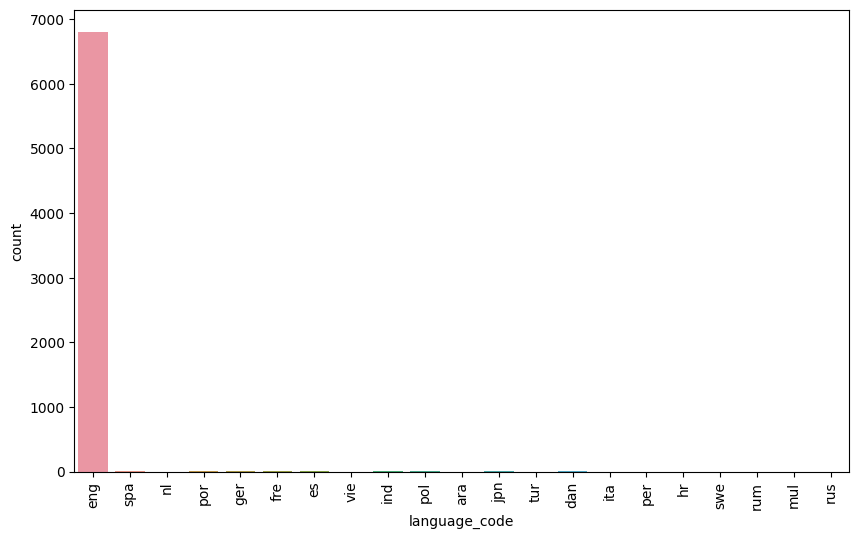

In [ ]:
# Obtiene conteo de valores únicos en columnas categóricas
print(df['language_code'].value_counts())

# Grafica barras de frecuencia de columnas categóricas
plt.figure(figsize=(10, 6))
sns.countplot(x='language_code', data=df)
plt.xticks(rotation=90)
plt.show()


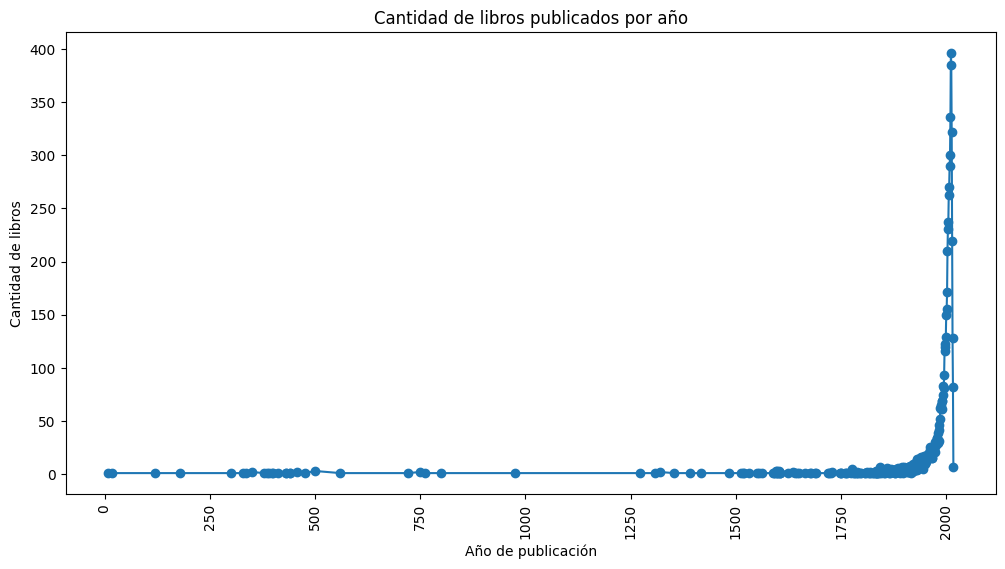

In [ ]:
plt.figure(figsize=(12, 6))
books_per_year = df['original_publication_year'].value_counts().sort_index()
plt.plot(books_per_year.index, books_per_year.values, marker='o')
plt.xlabel('Año de publicación')
plt.ylabel('Cantidad de libros')
plt.title('Cantidad de libros publicados por año')
plt.xticks(rotation=90)
plt.show()


In [ ]:
from collections import Counter

In [ ]:
texto_completo = ' '.join(df['texto'])
texto_completo = texto_completo.lower()
texto_limpio = ''.join(c if c.isalpha() or c.isspace() else ' ' for c in texto_completo)
palabras = texto_limpio.split()


In [ ]:
# Cuenta la frecuencia de las palabras
frecuencia_palabras = Counter(palabras)
# Filtra las palabras con 6 letras o más
palabras_4letras_mas = {palabra: frecuencia for palabra, frecuencia in frecuencia_palabras.items() if len(palabra) >= 6}


In [ ]:
# Ordena las palabras por su frecuencia de aparición en orden descendente
palabras_frecuentes = sorted(palabras_4letras_mas.items(), key=lambda x: x[1], reverse=True)[:10]
# Extrae las palabras y sus frecuencias en listas separadas
palabras_top = [palabra for palabra, _ in palabras_frecuentes]
frecuencias_top = [frecuencia for _, frecuencia in palabras_frecuentes]


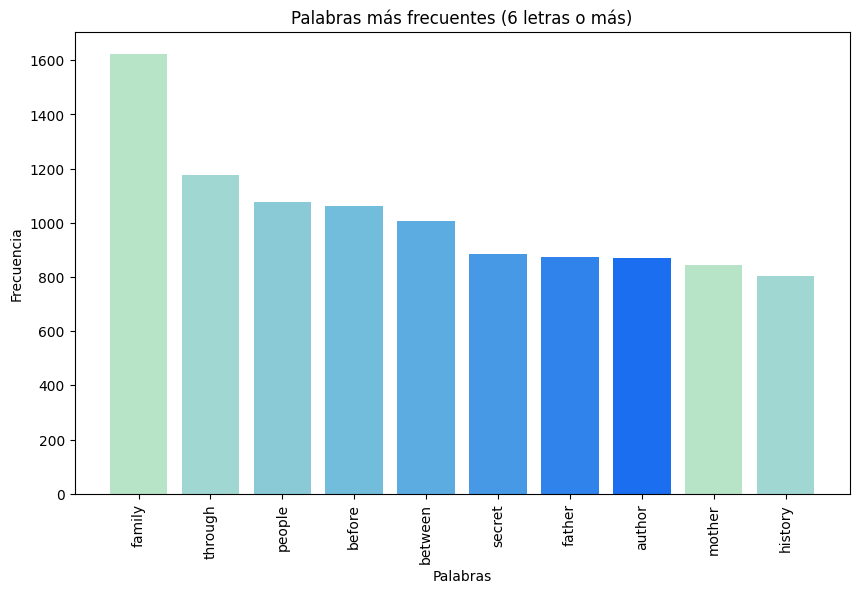

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(palabras_top, frecuencias_top, color=paleta_colores)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes (6 letras o más)')
plt.xticks(rotation=90)
plt.show()


##Distribuciones de generos

In [ ]:
#Genero 1
frecuencia_generos = df['genero_1'].value_counts()
frecuencia_generos

Fiction                4512
Nonfiction             1103
Romance                 868
Fantasy                 250
Young Adult              47
Childrens                37
Sequential Art           23
Mystery                  14
Historical               11
Religion                  3
Cultural                  3
History                   2
Literature                2
Science Fiction           2
Classics                  2
Thriller                  2
Self Help                 1
Humor                     1
Erotica                   1
European Literature       1
Name: genero_1, dtype: int64

#`genero_1` y `genero_2`

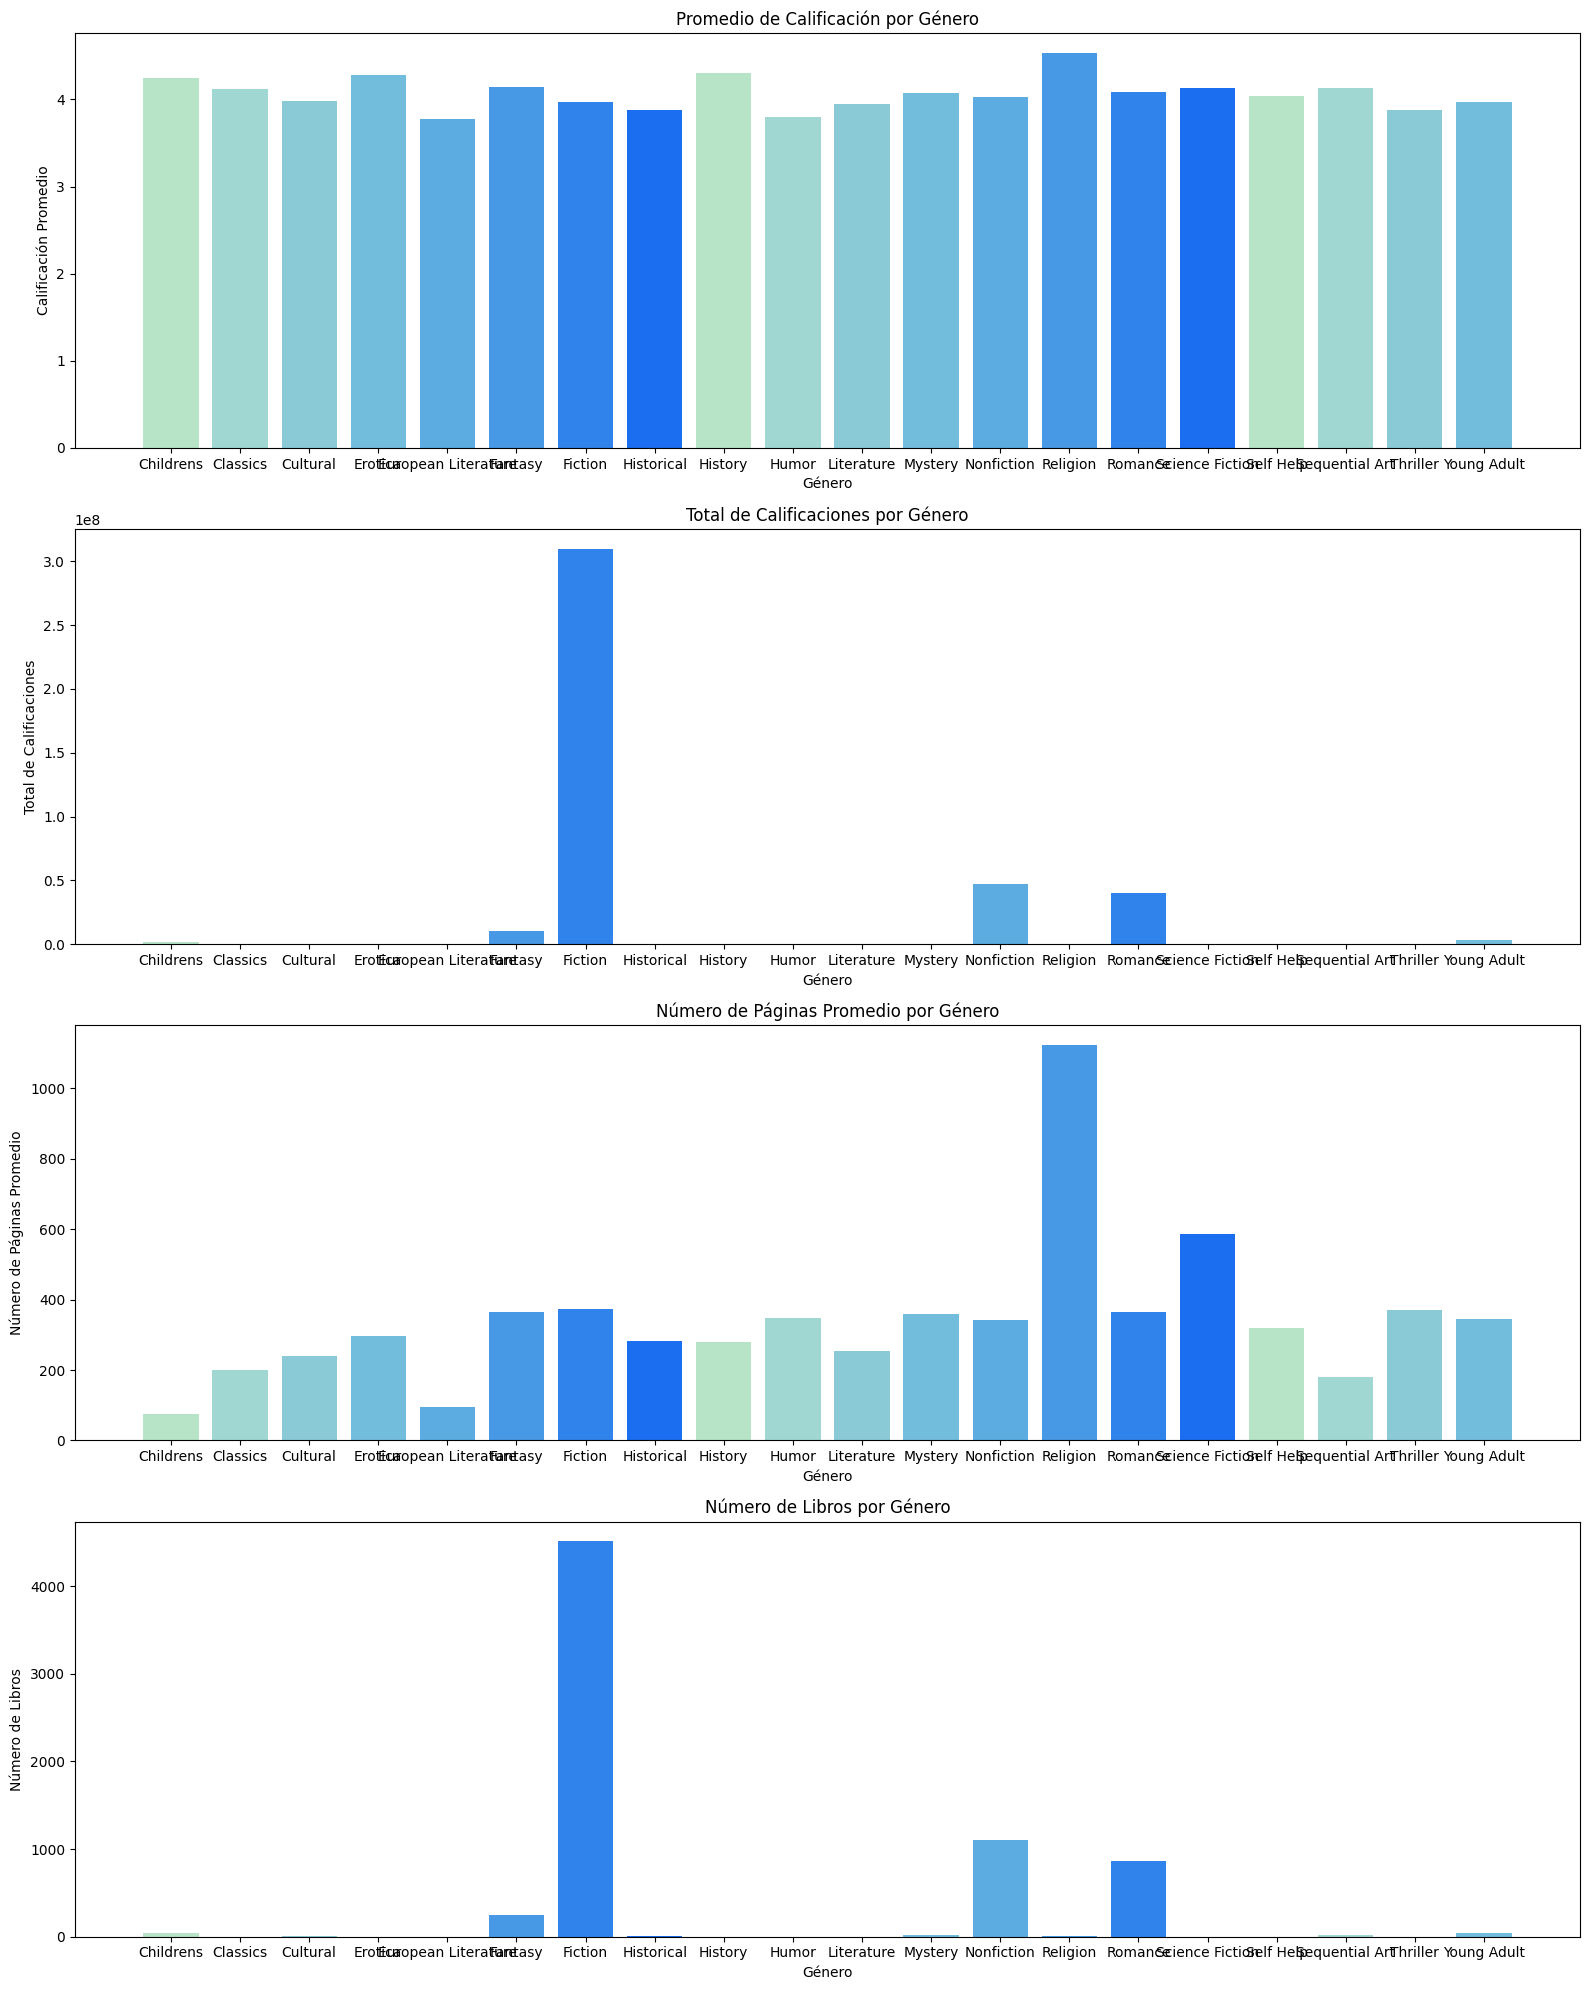

In [ ]:

# Crear los datos para los subplots
datos_subplot_1 = df.groupby('genero_1')['average_rating'].mean().reset_index()
datos_subplot_2 = df.groupby('genero_1')['ratings_count'].sum().reset_index()
datos_subplot_3 = df.groupby('genero_1')['pages'].mean().reset_index()
datos_subplot_4 = df.groupby('genero_1')['original_publication_year'].count().reset_index()

# Crear los subplots
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(16, 20))

# Subplot 1
axs[0].bar(datos_subplot_1['genero_1'], datos_subplot_1['average_rating'], color=paleta_colores)
axs[0].set_title('Promedio de Calificación por Género')
axs[0].set_xlabel('Género')
axs[0].set_ylabel('Calificación Promedio')
axs[0].tick_params(axis='x', rotation=60)


# Subplot 2
axs[1].bar(datos_subplot_2['genero_1'], datos_subplot_2['ratings_count'], color=paleta_colores)
axs[1].set_title('Total de Calificaciones por Género')
axs[1].set_xlabel('Género')
axs[1].set_ylabel('Total de Calificaciones')
axs[1].tick_params(axis='x', rotation=60)


# Subplot 3
axs[2].bar(datos_subplot_3['genero_1'], datos_subplot_3['pages'], color=paleta_colores)
axs[2].set_title('Número de Páginas Promedio por Género')
axs[2].set_xlabel('Género')
axs[2].set_ylabel('Número de Páginas Promedio')
axs[2].tick_params(axis='x', rotation=60)


# Subplot 4
axs[3].bar(datos_subplot_4['genero_1'], datos_subplot_4['original_publication_year'], color=paleta_colores)
axs[3].set_title('Número de Libros por Género')
axs[3].set_xlabel('Género')
axs[3].set_ylabel('Número de Libros')
axs[3].tick_params(axis='x', rotation=60)


# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()


In [ ]:
#Genero 2
frecuencia_generos2 = df['genero_2'].value_counts()
frecuencia_generos2

 Fantasy                1633
 Romance                1196
 Historical              735
 Mystery                 651
 Young Adult             306
 History                 298
 Cultural                261
 Childrens               243
 Literature              227
 Science Fiction         203
 Biography               186
 Religion                150
 Sequential Art          125
 Contemporary            119
 Science                  98
 Classics                 93
 Self Help                64
 Thriller                 54
 Humor                    38
 Philosophy               30
 Reference                21
 European Literature      19
 Autobiography            16
 Nonfiction               14
 Food and Drink           14
 Art                      10
 Business                  9
 Christian                 7
 Audiobook                 7
 Psychology                7
 Womens Fiction            6
 Short Stories             5
 Sports                    5
 Drama                     4
 Politics     

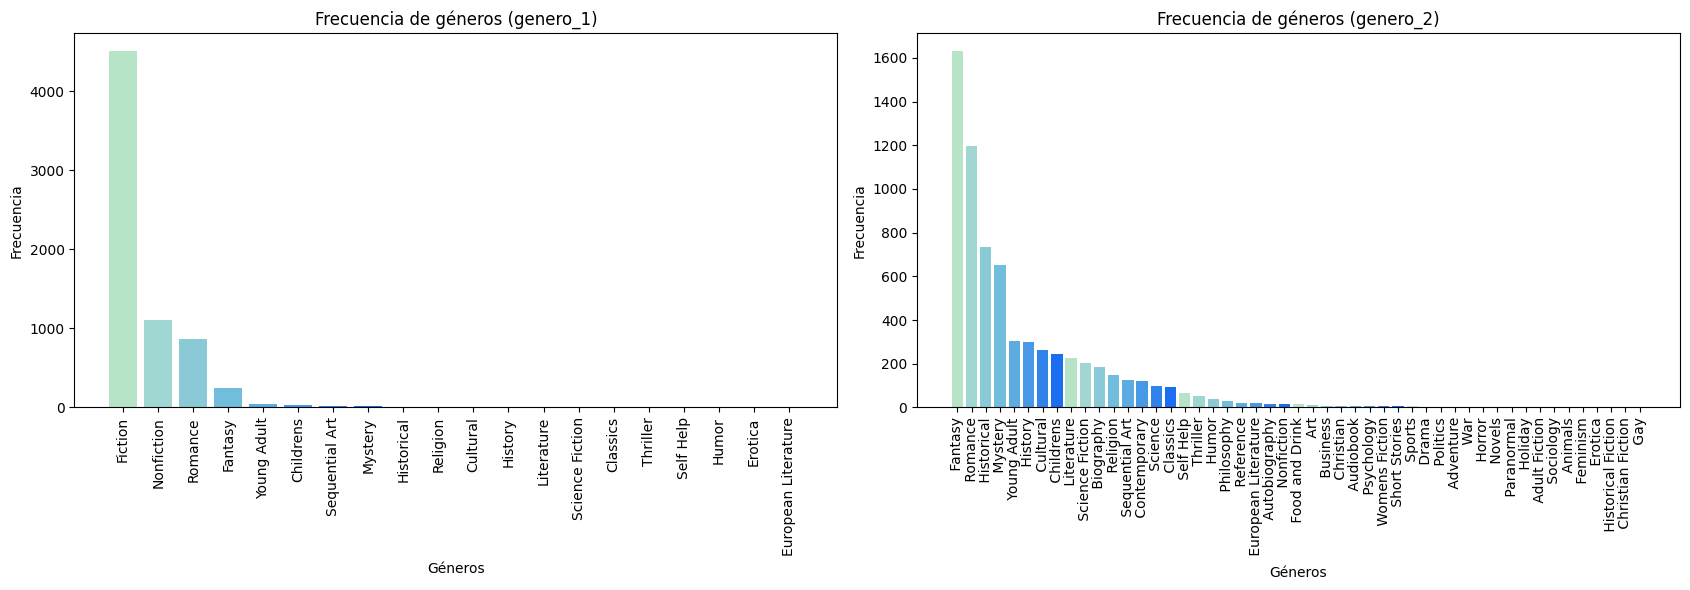

In [ ]:
# Define el tamaño de la figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

# Crea el subplot 1 para genero_1
axes[0].bar(frecuencia_generos.index, frecuencia_generos, color=paleta_colores)
axes[0].set_xlabel('Géneros')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Frecuencia de géneros (genero_1)')
axes[0].tick_params(axis='x', rotation=90)

# Crea el subplot 2 para genero_2
axes[1].bar(frecuencia_generos2.index, frecuencia_generos2, color=paleta_colores)
axes[1].set_xlabel('Géneros')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Frecuencia de géneros (genero_2)')
axes[1].tick_params(axis='x', rotation=90)

# Ajusta los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()


#`genero_3` y `genero_4`

In [ ]:
frecuencia_generos3 = df['genero_3'].value_counts()
frecuencia_generos3

 Fantasy            1110
 Mystery             637
 Historical          576
 Young Adult         505
 Contemporary        425
                    ... 
 Games                 1
 Anthologies           1
 Magical Realism       1
 Music                 1
 India                 1
Name: genero_3, Length: 93, dtype: int64

In [ ]:
# Filtramos los géneros que tienen menos de 3 registros
generos_menor = frecuencia_generos3[frecuencia_generos3 < 3]

# Agrupamos los géneros con menos de 3 registros en la categoría "Otros"
frecuencia_generos3['Otros'] = generos_menor.sum()

In [ ]:
frecuencia_generos4 = df['genero_4'].value_counts()
frecuencia_generos4

 Fantasy               561
 Young Adult           517
 Classics              340
 Thriller              312
 Historical Fiction    310
                      ... 
 Ireland                 1
 Video Games             1
 Occult                  1
 Abuse                   1
 Gender                  1
Name: genero_4, Length: 184, dtype: int64

In [ ]:
# Filtramos los géneros que tienen menos de 3 registros
generos_menor4 = frecuencia_generos4[frecuencia_generos4 < 3]

# Agrupamos los géneros con menos de 3 registros en la categoría "Otros"
frecuencia_generos4['Otros'] = generos_menor4.sum()

In [ ]:
#Filtramos los generos con mas de 3 libros
generos_mayor_3 = frecuencia_generos4[frecuencia_generos4 > 3]
generos_mayor_3_3 = frecuencia_generos3[frecuencia_generos3 > 3]

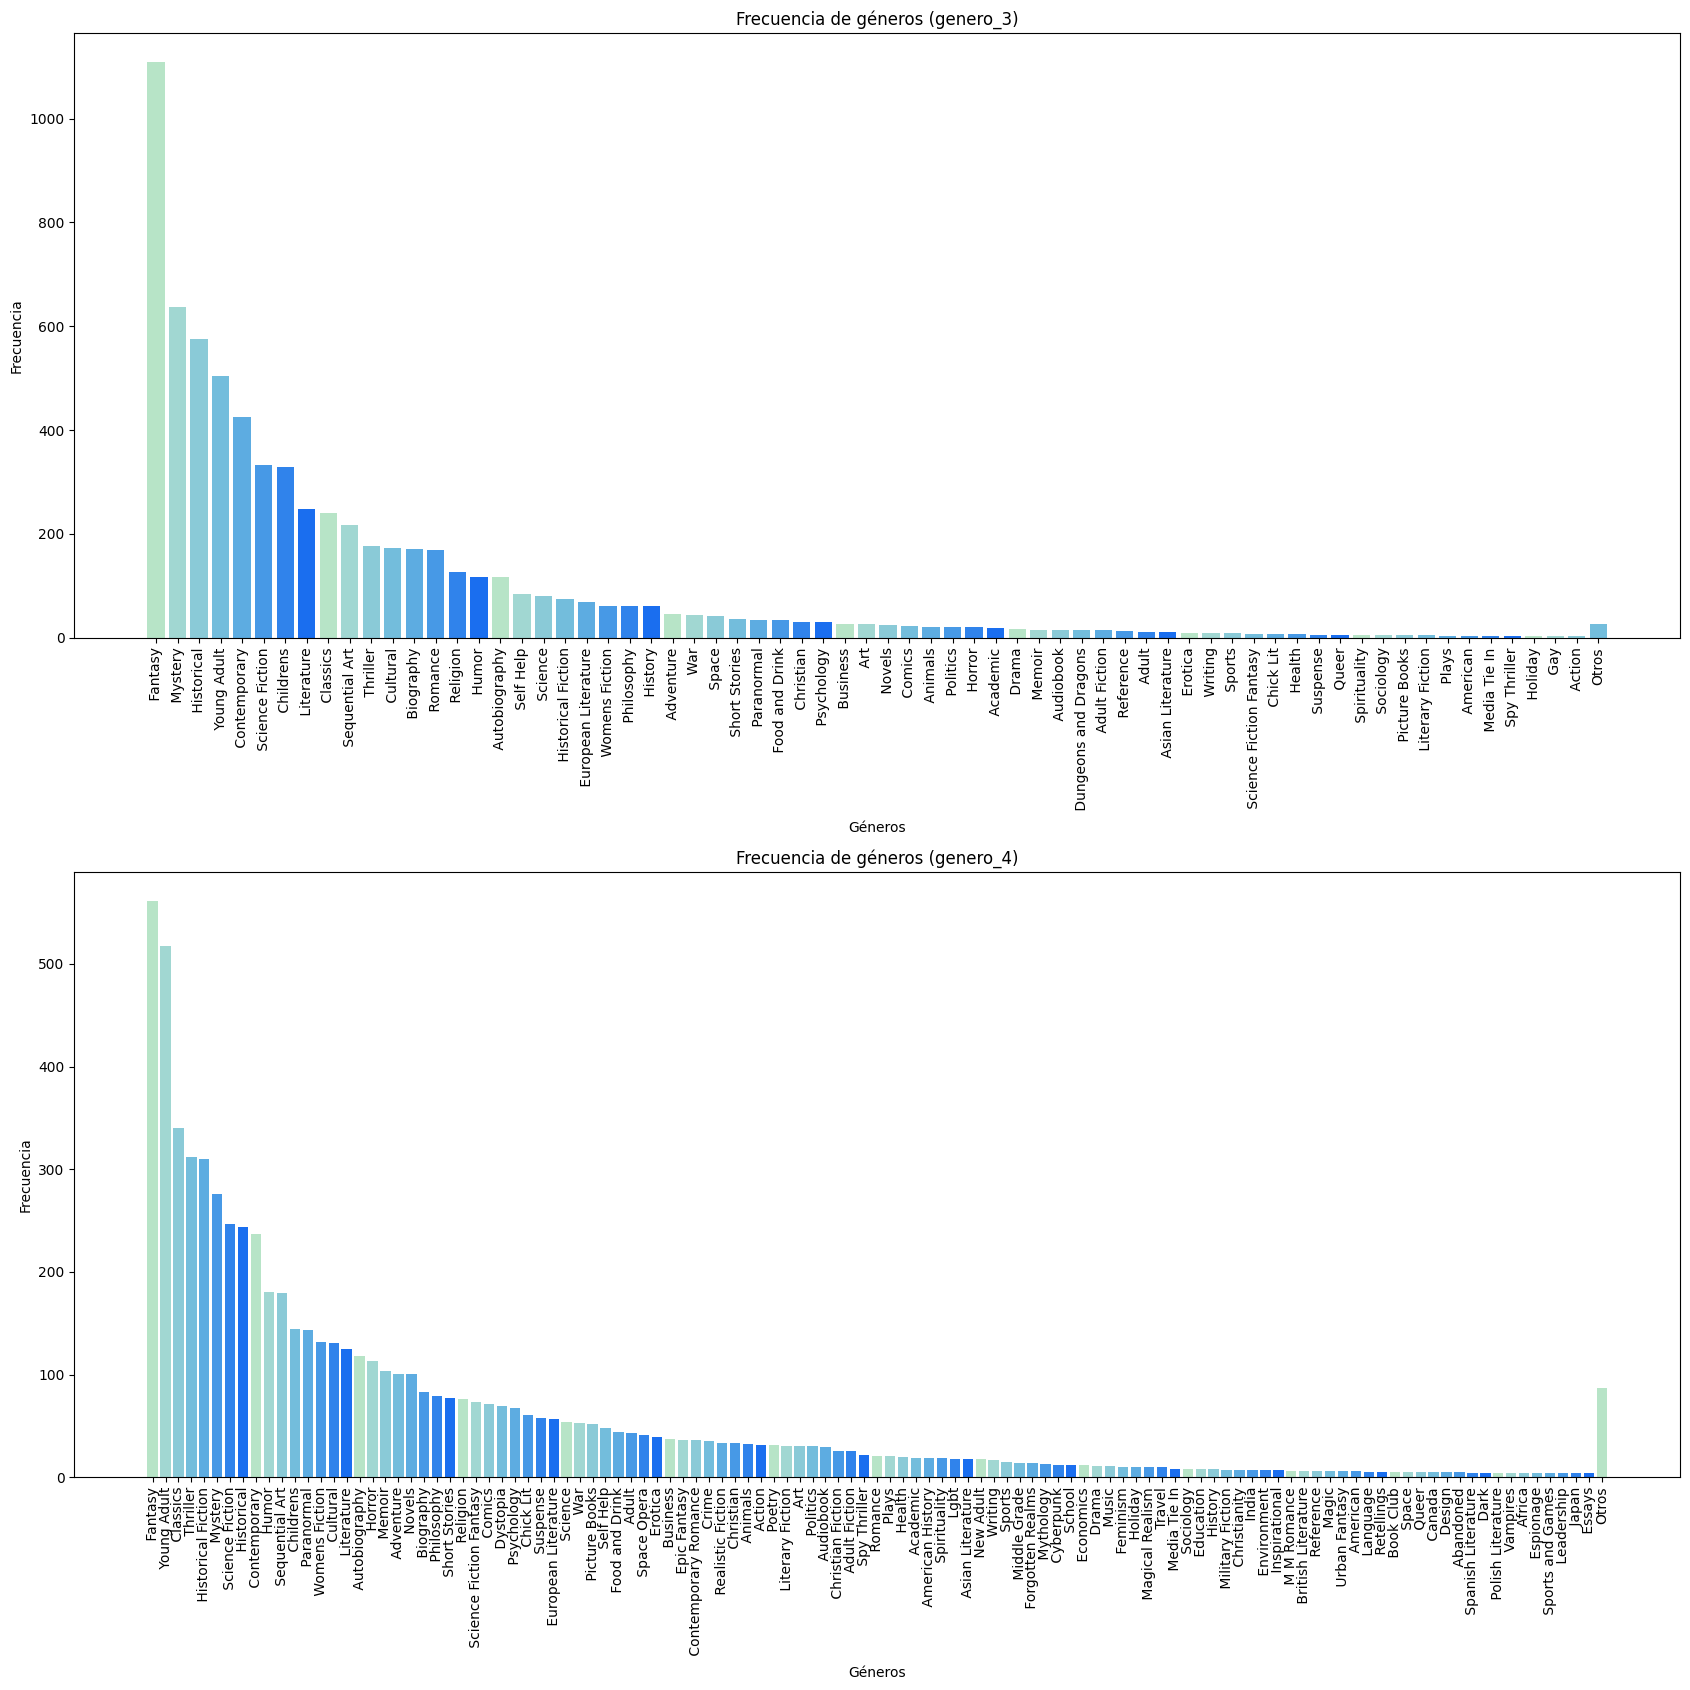

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(17 ,17 ))

# Crea el subplot 1 para genero_3
axes[0].bar(generos_mayor_3_3.index, generos_mayor_3_3, color=paleta_colores)
axes[0].set_xlabel('Géneros')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Frecuencia de géneros (genero_3)')
axes[0].tick_params(axis='x', rotation=90)

# Crea el subplot 2 para genero_4
axes[1].bar(generos_mayor_3.index, generos_mayor_3, color=paleta_colores)
axes[1].set_xlabel('Géneros')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Frecuencia de géneros (genero_4)')
axes[1].tick_params(axis='x', rotation=90)

# Ajusta los subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()
